<a href="https://colab.research.google.com/github/victorious07/Linear_Regression-_Car-Dekho/blob/main/Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

## demo...

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset
car_dekho = pd.read_csv('/content/drive/MyDrive/Dataset/CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
car_dekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
car_dekho.shape

(4340, 8)

In [ ]:
car_dekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
# duplicate
car_dekho.duplicated().sum()

763

In [ ]:
car_dekho.drop_duplicates(keep='first',inplace=True)

In [ ]:
car_dekho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


In [ ]:
car_dekho['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
car_dekho['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
car_dekho['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
car_dekho['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

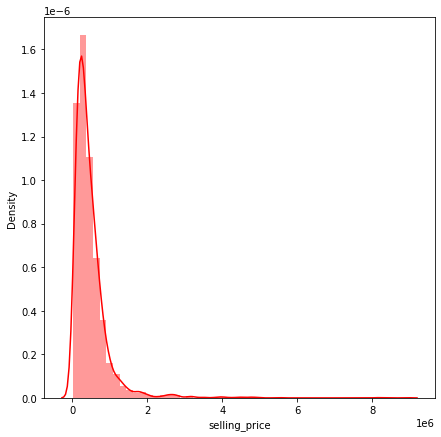

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(car_dekho['selling_price'],color='r')

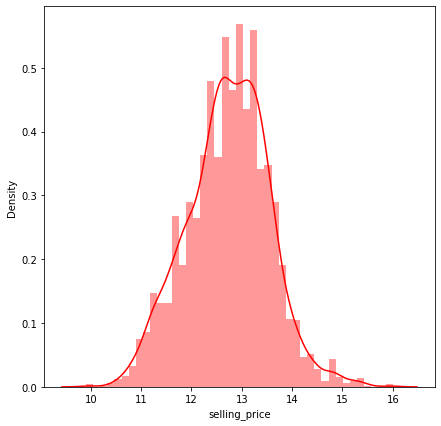

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(np.log(car_dekho['selling_price']),color='r')

In [ ]:
# selling_km_driven = car_dekho.groupby(['selling_price'])['km_driven'].mean().round(2).reset_index()
# selling_km_driven

Text(0, 0.5, 'No.of cars')

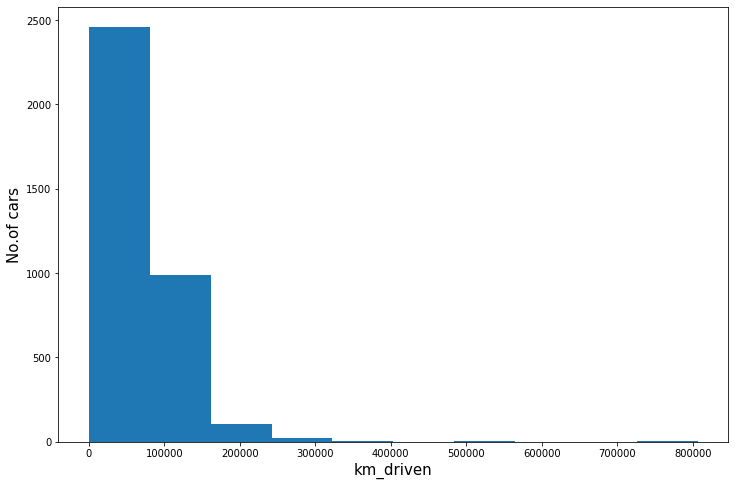

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(car_dekho['km_driven'])
plt.xlabel("km_driven",fontsize=15)
plt.ylabel("No.of cars",fontsize=15)

Text(0, 0.5, 'No.of cars')

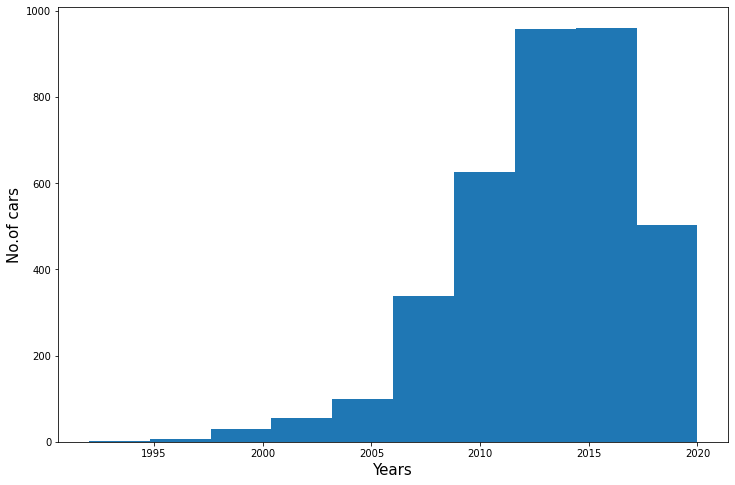

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(car_dekho['year'])
plt.xlabel("Years",fontsize=15)
plt.ylabel("No.of cars",fontsize=15)

In [ ]:
numeric_features = ['year','km_driven']

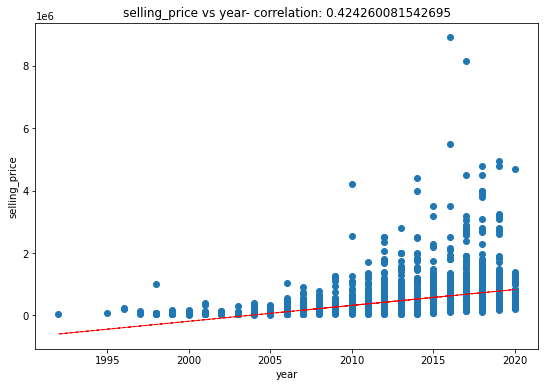

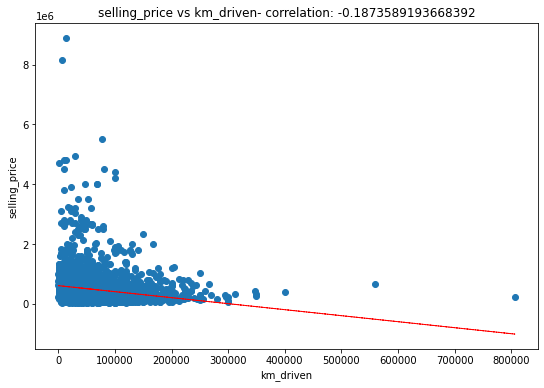

In [ ]:
for col_name in numeric_features:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()

  feature = car_dekho[col_name]
  label = car_dekho['selling_price']
  correlation = feature.corr(label)
  
  plt.scatter(x=feature, y=label)
  plt.xlabel(col_name)
  plt.ylabel('selling_price')
  ax.set_title('selling_price vs ' + col_name + '- correlation: ' + str(correlation))

  z = np.polyfit(car_dekho[col_name], car_dekho['selling_price'], 1)
  y_hat = np.poly1d(z)(car_dekho[col_name])

  plt.plot(car_dekho[col_name], y_hat, "r--", lw=1)

In [ ]:
car_dekho['current_year'] = 2022
car_dekho['car_age'] = car_dekho['current_year'] - car_dekho['year']

In [ ]:
car_dekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,car_age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022,15
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022,15
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022,10
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022,5
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022,8


**Removing outliers**

In [ ]:
car_dekho = car_dekho[car_dekho['year'] >= 2005]
car_dekho = car_dekho[car_dekho['km_driven'] <= 200000]
car_dekho.reset_index(inplace=True)
del car_dekho['index']

In [ ]:
car_dekho_price = car_dekho.copy()

In [ ]:
car_dekho_price.drop(['year','current_year'], axis=1,inplace=True)

In [ ]:
car_dekho_price.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,15
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,15
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,10
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,5
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,8


Text(0.5, 1.0, 'Seller_Type v/s Selling_Price')

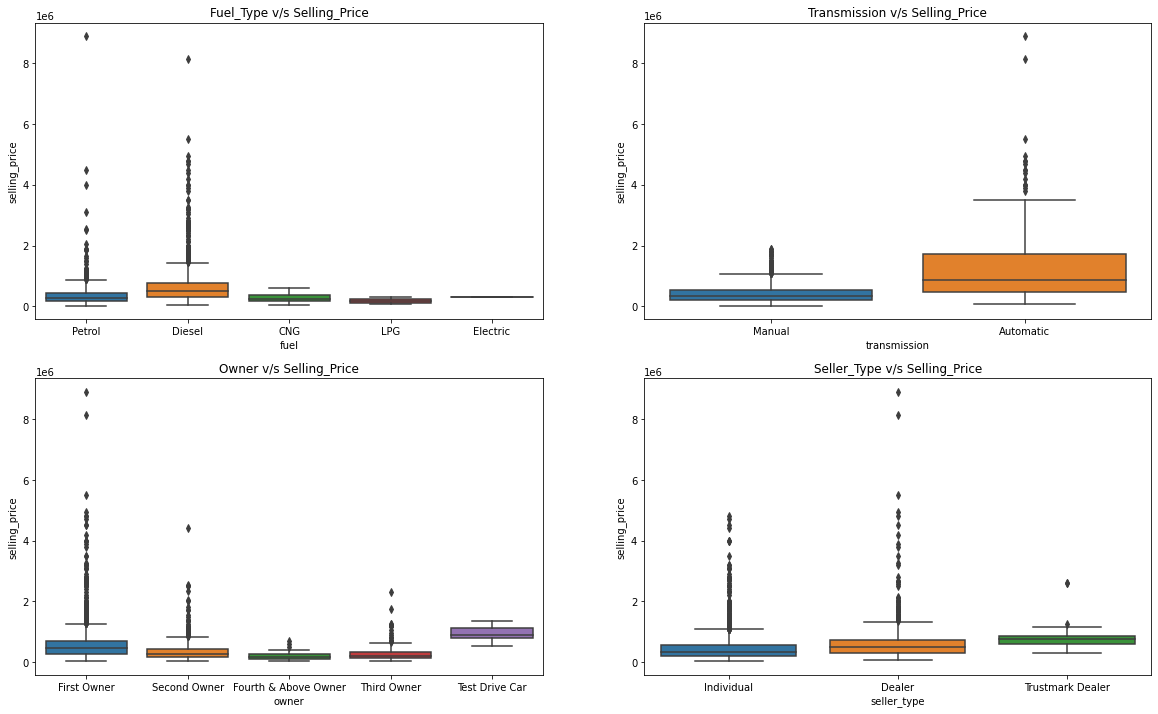

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(20,12))

sns.boxplot(x=car_dekho_price.fuel,y=car_dekho_price.selling_price,ax=axes[0][0])
axes[0][0].set_title('Fuel_Type v/s Selling_Price')

sns.boxplot(x=car_dekho_price.transmission,y=car_dekho_price.selling_price,ax=axes[0][1])
axes[0][1].set_title('Transmission v/s Selling_Price')

sns.boxplot(x=car_dekho_price.owner,y=car_dekho_price.selling_price,ax=axes[1][0])
axes[1][0].set_title('Owner v/s Selling_Price')

sns.boxplot(x=car_dekho_price.seller_type,y=car_dekho_price.selling_price,ax=axes[1][1])
axes[1][1].set_title('Seller_Type v/s Selling_Price')


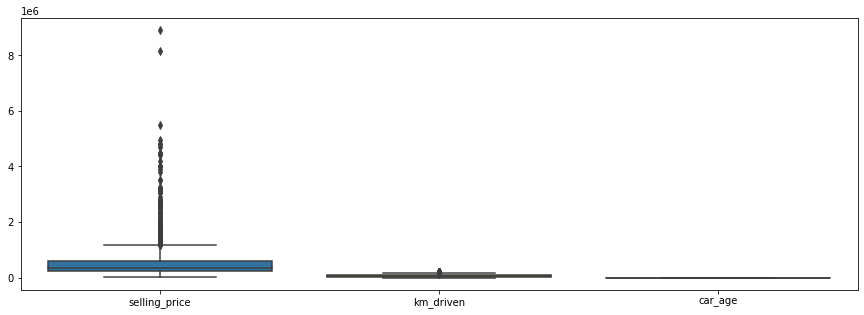

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(data=car_dekho_price)
plt.show()

In [ ]:
# q1 = car_dekho_price['selling_price'].quantile(0.25)
# q3 = car_dekho_price['selling_price'].quantile(0.75)
# iqr = q3-q1

# UL = q3 + (1.5 * iqr)
# LL = q1 - (1.5 * iqr)
# print(iqr,UL,LL)

In [ ]:
#car_dekho_price[car_dekho_price['selling_price']>UL]

In [ ]:
#car_dekho_price[car_dekho_price['selling_price']<UL]

In [ ]:
#cars_df = car_dekho_price[car_dekho_price['selling_price']<UL]

In [ ]:
# plt.figure(figsize = (15,5))
# sns.boxplot(data=cars_df)
# plt.show()

In [ ]:
# q1 = cars_df['km_driven'].quantile(0.25)
# q3 = cars_df['km_driven'].quantile(0.75)
# iqr = q3-q1

# UL = q3 + (1.5 * iqr)
# LL = q1 - (1.5 * iqr)
# print(iqr,UL,LL)

In [ ]:
# cars_df[cars_df['km_driven']>UL]

In [ ]:
# cars_df = cars_df[cars_df['km_driven']<UL]

In [ ]:
# plt.figure(figsize = (15,5))
# sns.boxplot(data=cars_df)
# plt.show()

In [ ]:
# plt.figure(figsize=(12,8))
# plt.hist(car_dekho['car_age'])
# plt.xlabel("Car Age",fontsize=15)
# plt.ylabel("No.of cars",fontsize=15)

In [ ]:
cars_df = car_dekho_price.copy()

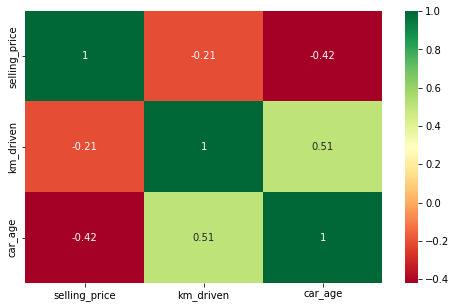

In [ ]:
plt.figure(figsize=(8,5))
correlation = cars_df.corr()
sns.heatmap(correlation, annot=True, cmap="RdYlGn")

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(cars_df[[i for i in cars_df.describe().columns if i not in ['name','selling_price']]])

,variables,VIF
0,km_driven,4.828747
1,car_age,4.828747


In [ ]:
numerical_features = ['km_driven','car_age']

In [ ]:
cars_df['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [ ]:
cars_df['company'] = cars_df['name'].str.split(' ', expand=True)[0]
cars_df['company'] = cars_df['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche'})
cars_df['company'] = cars_df['company'].str.title()
cars_df['company'].value_counts()

Maruti           993
Hyundai          614
Mahindra         300
Tata             299
Ford             215
Honda            207
Toyota           154
Chevrolet        150
Renault          110
Volkswagen        92
Nissan            52
Skoda             46
Audi              31
Fiat              30
Datsun            29
Bmw               25
Mercedes-Benz     19
Jaguar             5
Mitsubishi         5
Land               5
Volvo              4
Jeep               3
Mg                 2
Ambassador         2
Force              1
Isuzu              1
Kia                1
Name: company, dtype: int64

In [ ]:
cars_df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,company
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,15,Maruti
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,15,Maruti
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,10,Hyundai
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,5,Datsun
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,8,Honda


<Figure size 864x432 with 0 Axes>

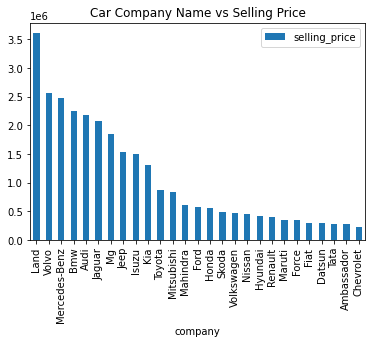

In [ ]:
fig = plt.figure(figsize=(12, 6))

df_autox = pd.DataFrame(cars_df.groupby(['company'])['selling_price'].mean().sort_values(ascending=False))
df_autox.plot.bar()
plt.title('Car Company Name vs Selling Price')
plt.show()

In [ ]:
df_autox.rename(columns={'selling_price':'Average_Selling_Price'},inplace=True)

In [ ]:
cars_df = cars_df.merge(df_autox,on = 'company',how = 'left')

In [ ]:
cars_df['company_category'] = cars_df['Average_Selling_Price'].apply(lambda x : 0 if x < 400000 else (1 if 400000 <= x < 700000 else 2))

In [ ]:
cars_df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,company,Average_Selling_Price,company_category
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,15,Maruti,350566.930514,0
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,15,Maruti,350566.930514,0
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,10,Hyundai,423908.747557,1
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,5,Datsun,296551.655172,0
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,8,Honda,557067.584541,1


In [ ]:
cars_df['company_category'].value_counts()

1    1636
0    1504
2     255
Name: company_category, dtype: int64

In [ ]:
cars_df_cpy = cars_df.copy()

In [ ]:
### Data encoding
#label encoding
encoders_nums = {
                 "owner":{"Test Drive Car":4,"First Owner":0,"Second Owner":1,"Third Owner":2,"Fourth & Above Owner":3},
                 }

cars_df_cpy = cars_df_cpy.replace(encoders_nums)

In [ ]:
cars_df_cpy.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,company,Average_Selling_Price,company_category
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,0,15,Maruti,350566.930514,0
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,0,15,Maruti,350566.930514,0
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,0,10,Hyundai,423908.747557,1
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,0,5,Datsun,296551.655172,0
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,1,8,Honda,557067.584541,1


In [ ]:
cars_df_cpy = pd.get_dummies(cars_df_cpy, columns=['fuel','seller_type','transmission'], prefix=['Fuel_Type','Seller_Type','Transmission'])

In [ ]:
cars_df_cpy.head(3)

,name,selling_price,km_driven,owner,car_age,company,Average_Selling_Price,company_category,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Automatic,Transmission_Manual
0,Maruti 800 AC,60000,70000,0,15,Maruti,350566.930514,0,0,0,0,0,1,0,1,0,0,1
1,Maruti Wagon R LXI Minor,135000,50000,0,15,Maruti,350566.930514,0,0,0,0,0,1,0,1,0,0,1
2,Hyundai Verna 1.6 SX,600000,100000,0,10,Hyundai,423908.747557,1,0,1,0,0,0,0,1,0,0,1


In [ ]:
cars_df_cpy.isnull().sum()

name                            0
selling_price                   0
km_driven                       0
owner                           0
car_age                         0
company                         0
Average_Selling_Price           0
company_category                0
Fuel_Type_CNG                   0
Fuel_Type_Diesel                0
Fuel_Type_Electric              0
Fuel_Type_LPG                   0
Fuel_Type_Petrol                0
Seller_Type_Dealer              0
Seller_Type_Individual          0
Seller_Type_Trustmark Dealer    0
Transmission_Automatic          0
Transmission_Manual             0
dtype: int64

In [ ]:
cars_df_cpy.columns

Index(['name', 'selling_price', 'km_driven', 'owner', 'car_age', 'company',
       'Average_Selling_Price', 'company_category', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Seller_Type_Trustmark Dealer', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')

In [ ]:
numerical_features

['km_driven', 'car_age']

In [ ]:
features = numerical_features.copy()
features.extend(['owner','Average_Selling_Price', 'company_category', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Seller_Type_Trustmark Dealer', 'Transmission_Automatic',
       'Transmission_Manual'])

In [ ]:
features

['km_driven',
 'car_age',
 'owner',
 'Average_Selling_Price',
 'company_category',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Electric',
 'Fuel_Type_LPG',
 'Fuel_Type_Petrol',
 'Seller_Type_Dealer',
 'Seller_Type_Individual',
 'Seller_Type_Trustmark Dealer',
 'Transmission_Automatic',
 'Transmission_Manual']

In [ ]:
target_variable = 'selling_price'

In [ ]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV

In [ ]:
X = cars_df_cpy[features].apply(zscore)
y = np.log10(cars_df_cpy[target_variable])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(2716, 15)
(679, 15)


In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg.score(X_train,y_train)

0.7459762179555134

In [ ]:
reg.coef_

array([-1.81596798e-02, -1.88179583e-01, -1.34608678e-02,  8.13206765e-02,
        5.89953213e-02,  1.22568458e+11,  5.90176218e+11, -1.63720174e+10,
        9.25592228e+10,  5.89462609e+11,  2.72521264e+12,  2.77158372e+12,
        6.60887920e+11,  1.42228528e+10,  1.42228528e+10])

In [ ]:
reg.intercept_

-628752128.2475951

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
MSE = mean_squared_error(10**(y_test),10**(y_pred))

print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 62060865409.00518
RMSE : 249120.18266091004


In [ ]:
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7579174316624375
Adjusted R2 :  0.7524404504783297


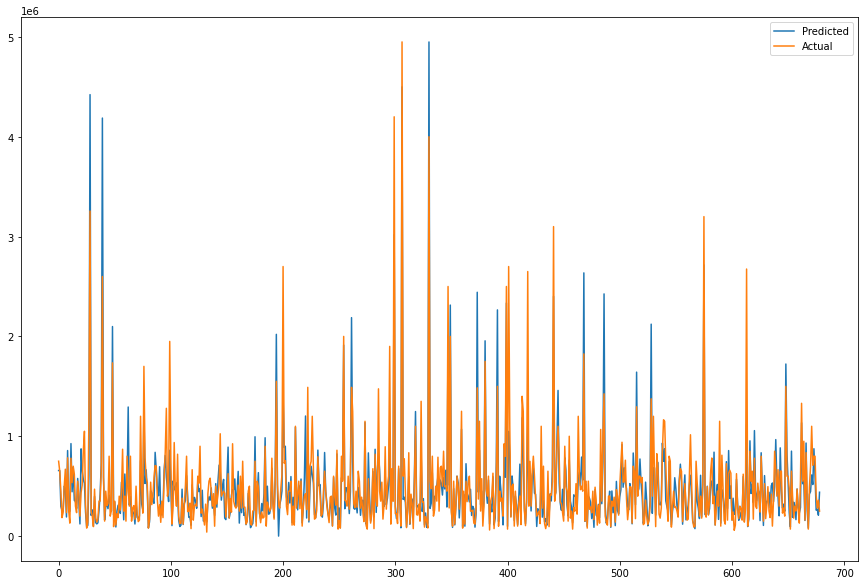

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'Predicted selling price')

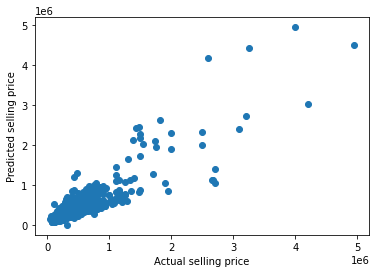

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

**Residuals**

Text(0.5, 0.98, 'Residual Analysis')

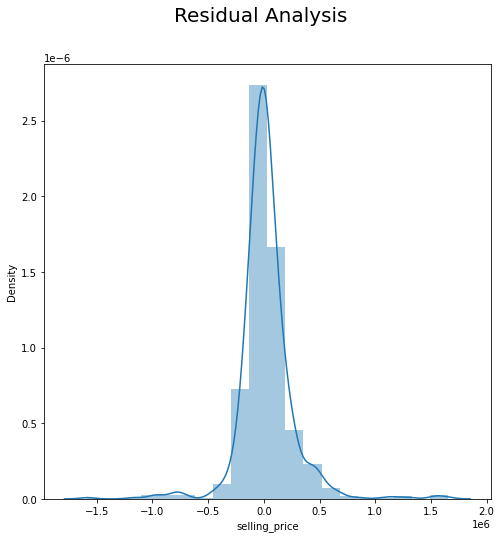

In [ ]:
fig=plt.figure(figsize=(8,8))
sns.distplot((10**(y_test) - 10**(y_pred)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

**Linear regression model from statsmodels.api.**

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
X = sm.add_constant(X)                        ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit()                    ## sm.OLS(output, input)
predictions = model.predict(X)

In [ ]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     851.2
Date:                Fri, 11 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:46:59   Log-Likelihood:                 1216.2
No. Observations:                3395   AIC:                            -2406.
Df Residuals:                    3382   BIC:                            -2327.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            5.5522      0.003   1909.251      0.000       5.546       5.558
km_driven                       -0.0155      0.004     -4.059      0.000      -0.023      -0.008
car_age                         -0.1897      0.004    -51.399      0.000      -0.197      -0.182
owner                           -0.0135      0.003     -4.225      0.000      -0.020      -0.007
Average_Selling_Price            0.0797      0.004     18.199      0.000       0.071       0.088
company_category                 0.0568      0.004     14.286      0.000       0.049       0.065
Fuel_Type_CNG                   -0.0094      0.003     -3.283      0.001      -0.015      -0.004
Fuel_Type_Diesel                 0.0447      0.002     26.130      0.000       0.041       0.048
Fuel_Type_Electric              -0.0008      0.003     -0.258      0.797      -0.006       0.005
Fuel_Type_LPG                   -0.0090      0.003     -3.139      0.002      -0.015      -0.003
Fuel_Type_Petrol                -0.0413      0.002    -24.174      0.000      -0.045      -0.038
Seller_Type_Dealer               0.0073      0.002      4.609      0.000       0.004       0.010
Seller_Type_Individual          -0.0104      0.002     -6.804      0.000      -0.013      -0.007
Seller_Type_Trustmark Dealer     0.0135      0.003      4.739      0.000       0.008       0.019
Transmission_Automatic           0.0211      0.002     12.337      0.000       0.018       0.024
Transmission_Manual             -0.0211      0.002    -12.337      0.000      -0.024      -0.018
==============================================================================
Omnibus:                       49.481   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.208
Skew:                          -0.162   Prob(JB):                     2.09e-16
Kurtosis:                       3.637   Cond. No.                     7.48e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.83e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

If we see above result Fuel_Type_Electric has **P>|t| is greater than 0.05** then we can ignore this one from our independen variable.....



**Lasso regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.005 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.005, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.7447901396565426

In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)


RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 59949780535.4719
RMSE : 244846.44276662852
R2 : 0.7661521999789194
Adjusted R2 :  0.7608615257702976


Text(0, 0.5, 'Predicted selling price')

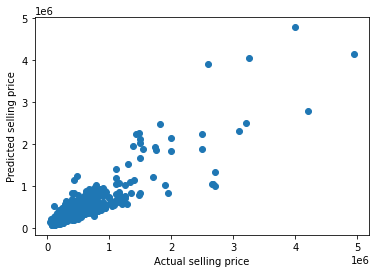

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_l))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

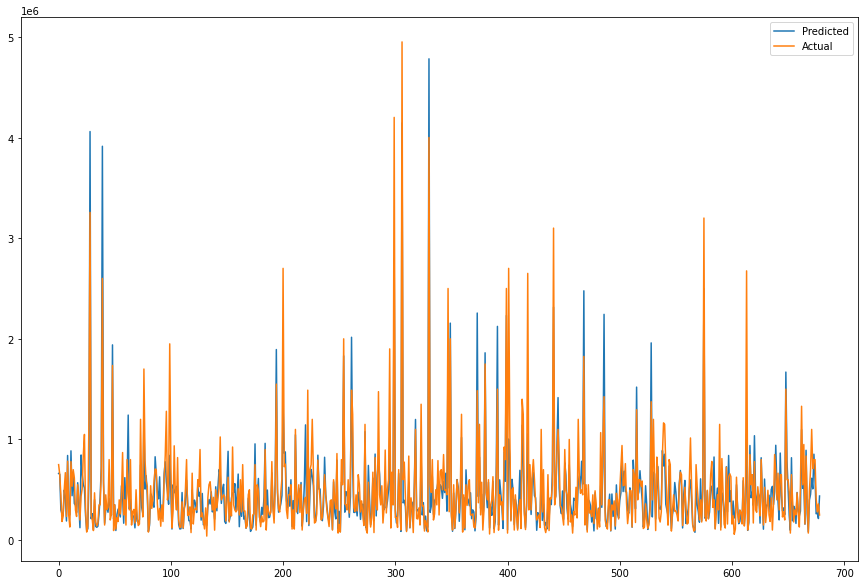

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(10**(y_pred_l))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

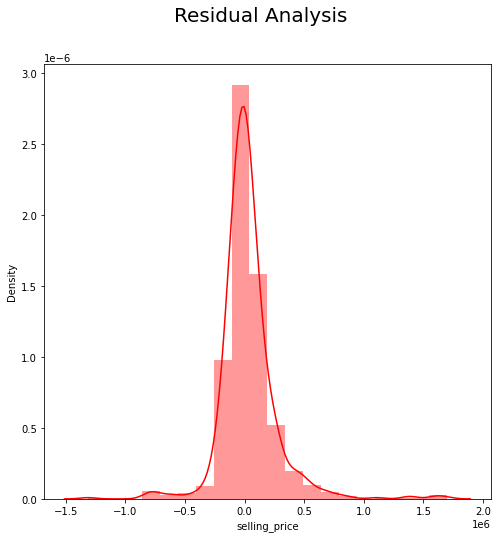

In [ ]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_l)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

**Implementing Cross-Validation Procedure for Lasso**


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.02934630974350454


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)


RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 61365598194.70936
RMSE : 247720.8069474774
R2 : 0.7606294800976051
Adjusted R2 :  0.7552138574753791


Text(0, 0.5, 'Predicted selling price')

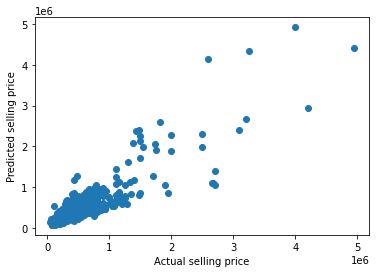

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_lasso))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

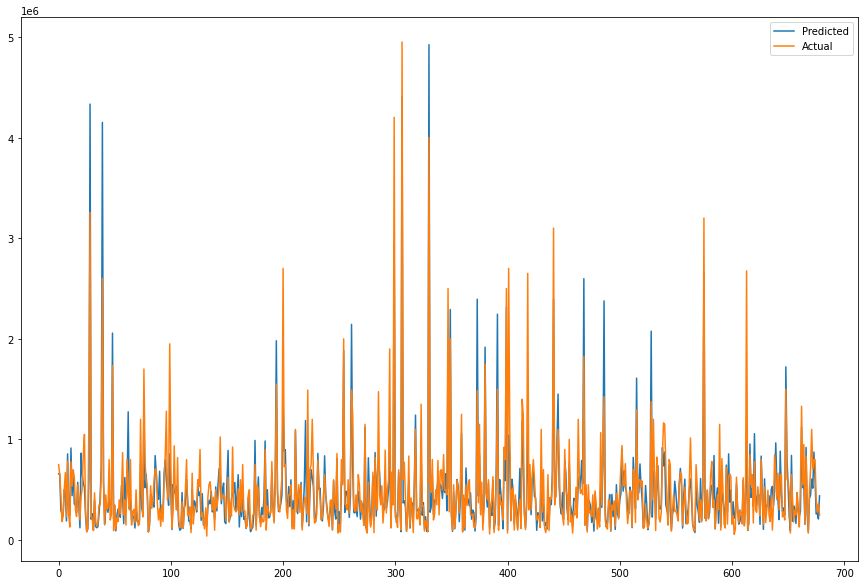

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

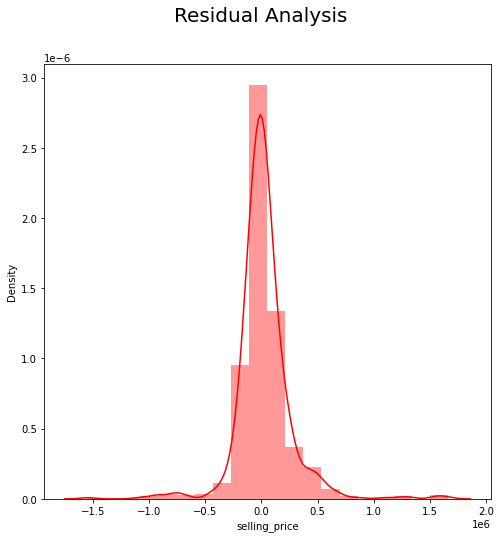

In [ ]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_lasso)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

**Implementing Ridge Regression**


In [ ]:
from sklearn.linear_model import Ridge
ridge  = Ridge(alpha=0.01)

ridge.fit(X_train, y_train)

Ridge(alpha=0.01)

In [ ]:
ridge.score(X_train,y_train)

0.7460217021824864

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 61985423632.183334
RMSE : 248968.72018826648
R2 : 0.7582117095293771
Adjusted R2 :  0.7527413862155621


Text(0, 0.5, 'Predicted selling price')

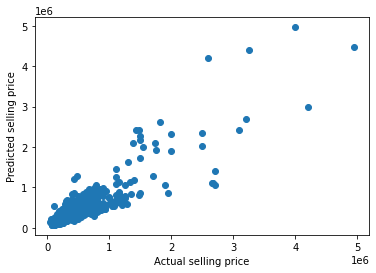

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_r))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

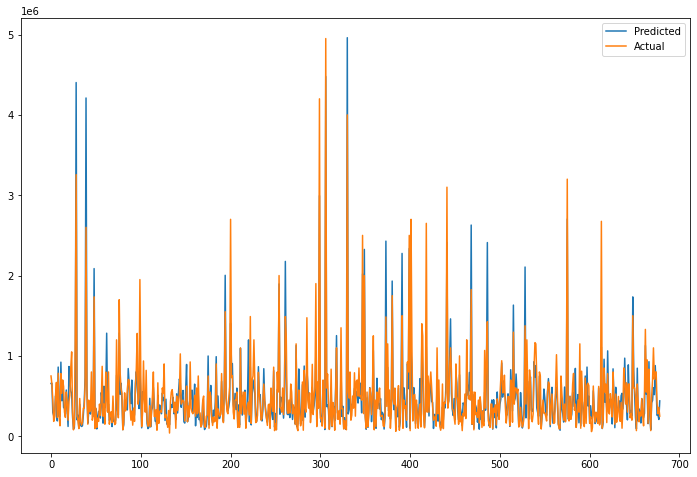

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(10**(y_pred_r))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

**Implementing Cross-Validation Procedure for Ridge**


In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.029408608138141886


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 61985423632.183334
RMSE : 248968.72018826648
R2 : 0.7582117095293771
Adjusted R2 :  0.7527413862155621


Text(0, 0.5, 'Predicted selling price')

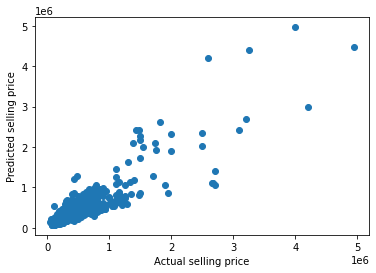

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_ridge))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

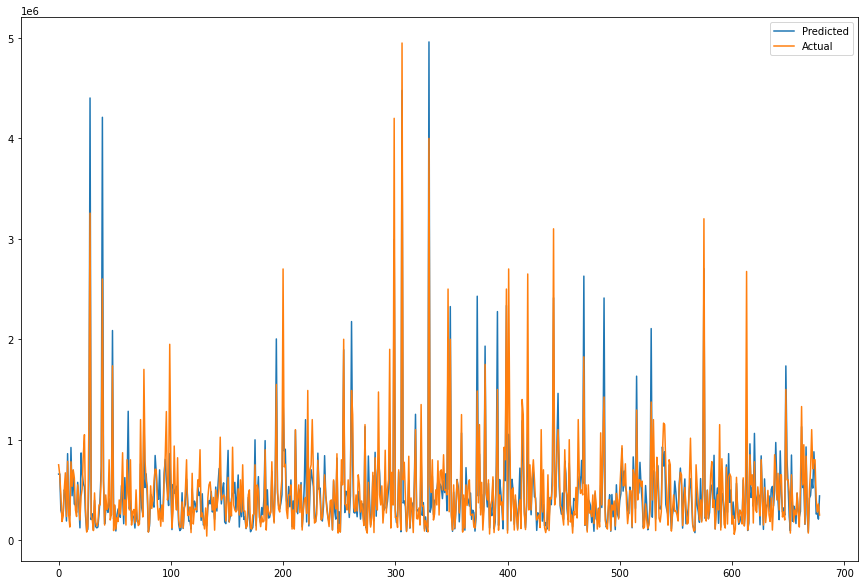

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

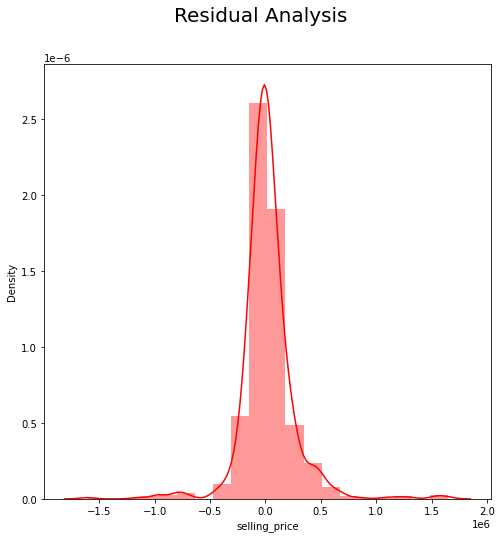

In [ ]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_ridge)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   